Collecting Data

In [91]:
import numpy as np
import pandas as pd
import datetime
!pip install quandl
import quandl

1. Choose five distinct equities or assets (oil, gold, bonds, currency pairs, bitcoins, etc…). Verify there is data available to import from Quandl or Yahoo.
2. Import daily prices (adj closing or spot) for all five assets. Use 1/1/2018 as the start date and 12/31/2018 as the end date. Display the first 5 rows and the total count for each asset.

In [92]:
# palladium
quandl.ApiConfig.api_key = 'sGoMaA6d9ssqDr7J88iS'
palladium_data = quandl.get("JOHNMATT/PALL", start_date = "2018-01-01", end_date = "2018-12-31")
palladium_data.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30
Date,,,,
2018-01-02,1073.0,1078.0,1077.0,1089.0
2018-01-03,1100.0,1098.0,1095.0,1091.0
2018-01-04,1088.0,1090.0,1104.0,1104.0
2018-01-05,1106.0,1106.0,1104.0,1096.0
2018-01-08,1100.0,1101.0,1104.0,1097.0


In [93]:
palladium_data['New York 9:30'].count()

246

In [94]:
# gold
gold_data = quandl.get("WGC/GOLD_DAILY_USD", start_date = "2018-01-01", end_date = "2018-12-31")
gold_data.head()

,Value
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15


In [95]:
gold_data.count()

Value    261
dtype: int64

In [96]:
# platinum
platinum_prices = quandl.get("LPPM/PLAT", start_date = "2018-01-01", end_date = "2018-12-31")
platinum_prices.head()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
Date,,,,,,
2018-01-02,937.0,776.63,690.75,936.0,776.44,690.52
2018-01-03,944.0,784.05,694.88,951.0,790.85,701.59
2018-01-04,953.0,791.86,703.84,959.0,794.53,708.53
2018-01-05,963.0,799.50,711.75,966.0,801.33,712.13
2018-01-08,967.0,806.51,714.97,971.0,811.19,716.87


In [97]:
platinum_prices['USD PM'].count()

250

In [98]:
# bitcoin
bitcoin_data = quandl.get("BCHAIN/MKPRU", start_date = "2018-01-01", end_date = "2018-12-31")
bitcoin_data.head()

,Value
Date,
2018-01-01,14165.575000
2018-01-02,13812.186667
2018-01-03,15005.856667
2018-01-04,15053.261667
2018-01-05,15199.355000


In [99]:
bitcoin_data.count()

Value    365
dtype: int64

In [100]:
# corn
cornprices = quandl.get("TFGRAIN/CORN", start_date = "2018-01-01", end_date = "2018-12-31")
cornprices.head()

,Cash Price,Basis,Fall Price,Fall Basis
Date,,,,
2018-01-02,3.32,-0.21,3.60,-0.27
2018-01-03,3.32,-0.21,3.59,-0.27
2018-01-04,3.30,-0.21,3.58,-0.27
2018-01-05,3.30,-0.21,3.58,-0.27
2018-01-08,3.27,-0.20,3.54,-0.27


In [101]:
cornprices['Cash Price'].count()

251

In [102]:
import requests
import json

3. Import daily prices for the S&P 500. Use 1/1/2018 as the start date and 12/31/2018 as the end date. Display the first 5 rows and the total count of the S&P.

In [103]:
# S&P 500 INDEX
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=0ZEWHW9LZGSWFJIR'
resp = requests.get(url)

In [104]:
data = resp.json()

In [105]:
sp500 = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
sp500 = sp500.T
dateRange = pd.DataFrame(sp500.loc['2018-12-31':'2018-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2018-01-02,170.16,172.3,169.26,172.26,41.4400863936,25048048,0.0000,1.0
2018-01-03,172.53,174.55,171.96,172.23,41.432869381,28819653,0.0000,1.0
2018-01-04,172.54,173.47,172.08,173.03,41.6253230506,22211345,0.0000,1.0
2018-01-05,173.44,175.37,173.05,175.0,42.0992402118,23016177,0.0000,1.0
2018-01-08,174.35,175.61,173.93,174.35,41.9428716053,20134092,0.0000,1.0


In [106]:
len(dateRange)

251

Processing Data

4. Calculate daily % change for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.

In [107]:
palladium = palladium_data['New York 9:30'].pct_change() # palladium
palladium.head()

Date
2018-01-02         NaN
2018-01-03    0.001837
2018-01-04    0.011916
2018-01-05   -0.007246
2018-01-08    0.000912
Name: New York 9:30, dtype: float64

In [108]:
gold = gold_data.pct_change() # gold
gold.head()

,Value
Date,
2018-01-01,NaN
2018-01-02,0.016305
2018-01-03,0.002172
2018-01-04,-0.000304
2018-01-05,0.002016


In [109]:
bitcoin = bitcoin_data.pct_change() # bitcoin
bitcoin.head()

,Value
Date,
2018-01-01,NaN
2018-01-02,-0.024947
2018-01-03,0.086422
2018-01-04,0.003159
2018-01-05,0.009705


In [110]:
platinum = platinum_prices['USD PM'].pct_change() # platinum
platinum.head()

Date
2018-01-02         NaN
2018-01-03    0.016026
2018-01-04    0.008412
2018-01-05    0.007299
2018-01-08    0.005176
Name: USD PM, dtype: float64

In [111]:
corn = cornprices['Cash Price'].pct_change() # corn
corn.head()

Date
2018-01-02         NaN
2018-01-03    0.000000
2018-01-04   -0.006024
2018-01-05    0.000000
2018-01-08   -0.009091
Name: Cash Price, dtype: float64

In [112]:
sp500_close = dateRange.iloc[::-1]['4. close'].astype(np.float64).pct_change() # sp500
sp500_close.head()

2018-01-02         NaN
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
Name: 4. close, dtype: float64

5. Plot the daily % change data using a bar graph for each asset.

In [113]:
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.ticker as ticker

<IPython.core.display.Javascript object>


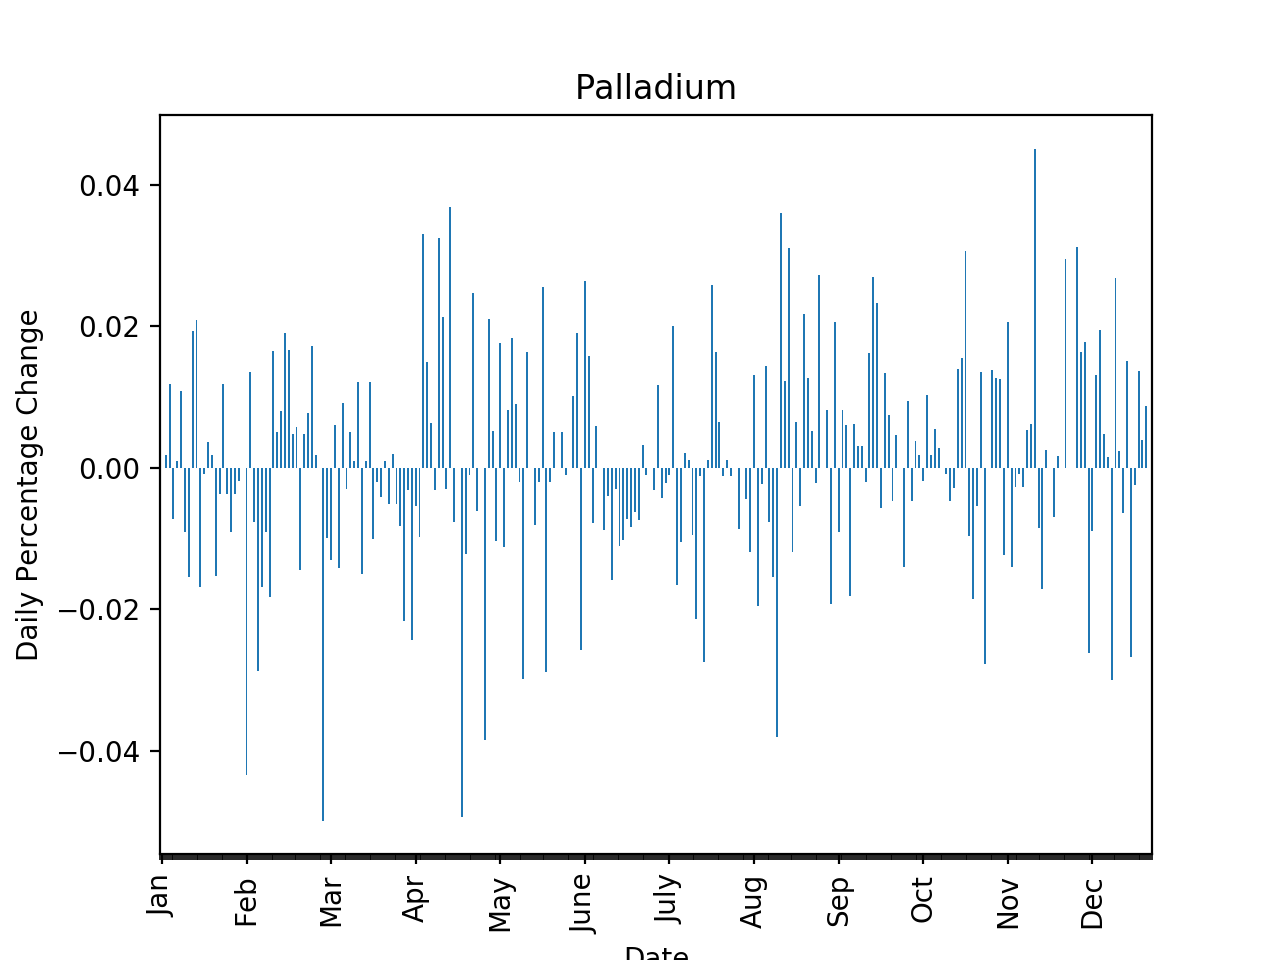

In [114]:
month = [" ","Jan", "Feb","Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"," "]
graph_1 = palladium.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Date')
plt.title('Palladium')
graph_1.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_1.xaxis.set_major_formatter(ticker.FixedFormatter(month))
minors = [""] + ["%.2f" % (x-int(x)) 
                 if (x-int(x))
                 else "" 
                 for x in np.arange(0, 13, 1.0)]
graph_1.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

In [115]:
#plt.rcParams['figure.figsize'] = (16,10) # to increase the size of the plot (to better see)

<IPython.core.display.Javascript object>


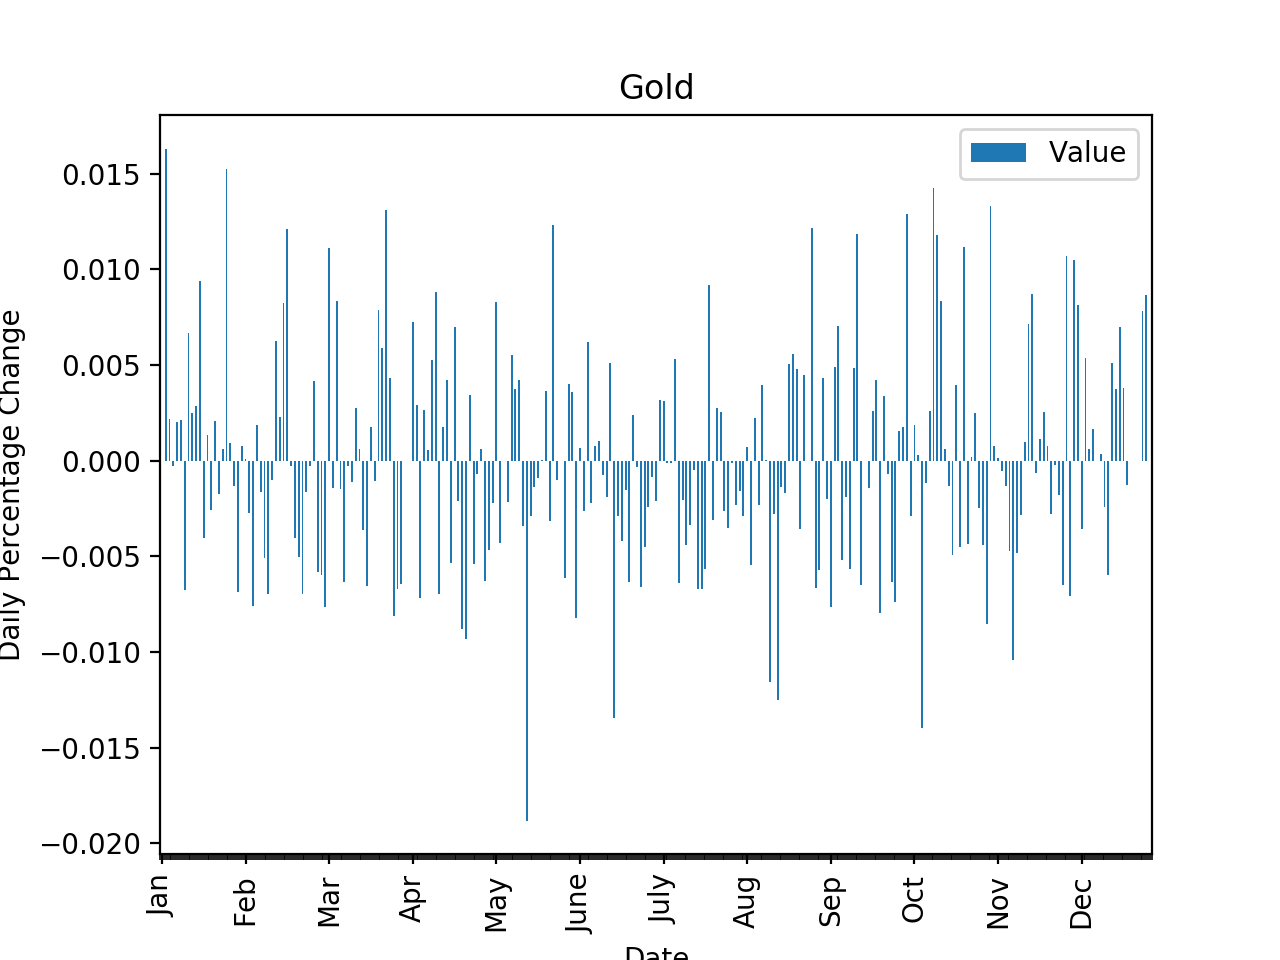

In [116]:
graph_2 = gold.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Date')
plt.title('Gold')
graph_2.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_2.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_2.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

<IPython.core.display.Javascript object>


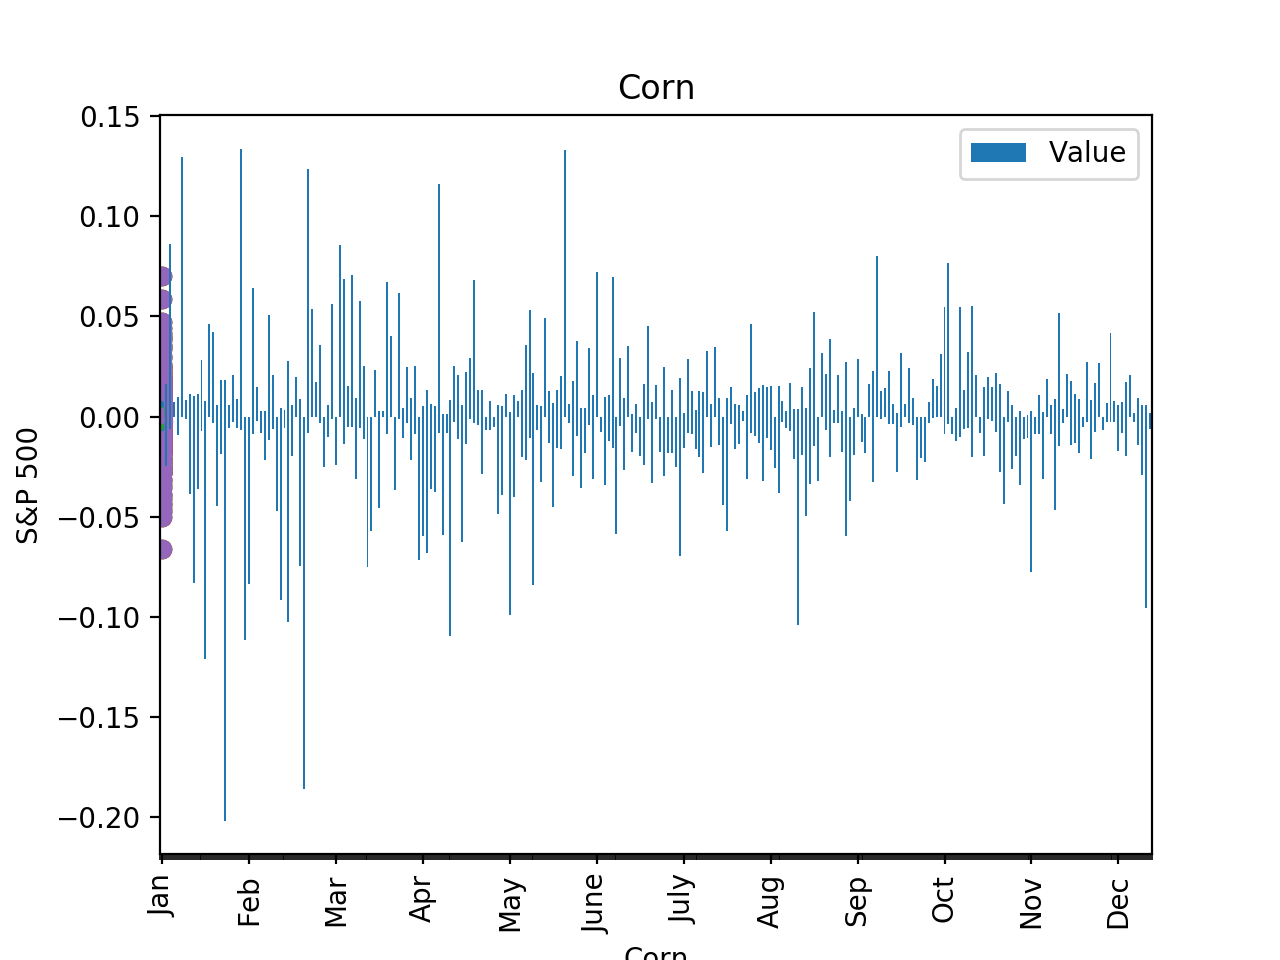

In [117]:
graph_3 = bitcoin.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Date')
plt.title('Bitcoin')
graph_3.xaxis.set_major_locator(ticker.MultipleLocator(32.00))
graph_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_3.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_3.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

In [118]:
graph_4 = platinum.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Date')
plt.title('Platinum')
graph_4.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_4.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_4.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_4.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

In [119]:
graph_5 = corn.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Date')
plt.title('Corn')
graph_5.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_5.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_5.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_5.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

6. Calculate and display the mean, standard deviation, variance, min, and max for each set of data.

In [120]:
palladium.describe()

count    257.000000
mean       0.000710
std        0.014767
min       -0.049859
25%       -0.007612
50%        0.000000
75%        0.009193
max        0.045093
Name: New York 9:30, dtype: float64

In [121]:
palladium.var()

0.00021806309723579944

In [122]:
gold.describe()

,Value
count,260.000000
mean,-0.000020
std,0.005593
min,-0.018828
25%,-0.003559
50%,-0.000232
75%,0.003128
max,0.016305


In [123]:
gold.var()

Value    0.000031
dtype: float64

In [124]:
bitcoin.describe()

,Value
count,364.000000
mean,-0.002716
std,0.041286
min,-0.202052
25%,-0.020114
50%,0.000150
75%,0.014583
max,0.133803


In [125]:
bitcoin.var()

Value    0.001705
dtype: float64

In [126]:
platinum.describe()

count    251.000000
mean      -0.000639
std        0.009715
min       -0.038462
25%       -0.006938
50%       -0.001182
75%        0.004460
max        0.032581
Name: USD PM, dtype: float64

In [127]:
platinum.var()

9.437298324976734e-05

In [128]:
corn.describe()

count    250.000000
mean       0.000245
std        0.012670
min       -0.042424
25%       -0.005984
50%        0.000000
75%        0.007890
max        0.054878
Name: Cash Price, dtype: float64

In [129]:
corn.var()

0.00016051866337383217

In [130]:
sp500_close.describe()

count    250.000000
mean      -0.000189
std        0.018109
min       -0.066331
25%       -0.009023
50%        0.000518
75%        0.009298
max        0.070422
Name: 4. close, dtype: float64

In [131]:
sp500_close.var()

0.0003279354188889505

Regression Analysis

7. Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. Y should be % change S&P 500. X should be % change for each asset.

In [132]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()

In [133]:
# linear palladium vs sp500
dfpalladium = pd.DataFrame(palladium).astype(float)
dfpalladium.columns = ['% change Palladium']
dfsp500 = pd.DataFrame(sp500_close)
dfsp500.columns = ['% change S&P 500']
regpalladium = reg.fit(dfpalladium[1:len(dfsp500)][['% change Palladium']], dfsp500[1:][['% change S&P 500']])
palladium_pred = reg.predict(dfpalladium[1:][['% change Palladium']])

In [134]:
# linear gold vs sp500
gold.columns = ['% change Gold']
reggold = reg.fit(gold[1:len(dfsp500)][['% change Gold']], dfsp500[1:][['% change S&P 500']])
gold_pred = reg.predict(gold[1:][['% change Gold']])

In [135]:
# linear bitcoin vs sp500
bitcoin.columns = ['% change Bitcoin']
regbitcoin = reg.fit(bitcoin[1:len(dfsp500)][['% change Bitcoin']], dfsp500[1:][['% change S&P 500']])
bitcoin_pred = reg.predict(bitcoin[1:][['% change Bitcoin']])

In [136]:
# linear platinum vs sp500
dfplatinum = pd.DataFrame(platinum)
dfplatinum.columns = ['% change Platinum']
regplatinum = reg.fit(dfplatinum[1:len(dfsp500)][['% change Platinum']], dfsp500[1:][['% change S&P 500']])
platinum_pred = reg.predict(dfplatinum[1:][['% change Platinum']])

In [137]:
# linear corn vs sp500
dfcorn = pd.DataFrame(corn)
dfcorn.columns = ['% change Corn']
regcorn = reg.fit(dfcorn[1:][['% change Corn']], dfsp500[1:][['% change S&P 500']])
corn_pred = reg.predict(dfcorn[1:][['% change Corn']])

8. For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.

In [138]:
# palladium
plt.xlabel('Palladium')
plt.ylabel('S&P 500')
plt.scatter(dfpalladium[:len(dfsp500)]['% change Palladium'], dfsp500['% change S&P 500'])
plt.plot(dfpalladium[1:]['% change Palladium'], palladium_pred)

In [139]:
# gold
plt.xlabel('Gold')
plt.ylabel('S&P 500')
plt.scatter(gold[:len(dfsp500)]['% change Gold'], dfsp500['% change S&P 500'])
plt.plot(gold[1:]['% change Gold'], gold_pred)

In [140]:
# bitcoin
plt.xlabel('Bitcoin')
plt.ylabel('S&P 500')
plt.scatter(bitcoin[:len(dfsp500)]['% change Bitcoin'], dfsp500['% change S&P 500'])
plt.plot(bitcoin[1:]['% change Bitcoin'], bitcoin_pred)

In [141]:
# platinum
plt.xlabel('Platinum')
plt.ylabel('S&P 500')
plt.scatter(dfplatinum[:len(dfsp500)]['% change Platinum'], dfsp500['% change S&P 500'])
plt.plot(dfplatinum[1:]['% change Platinum'], platinum_pred)

In [142]:
# corn
plt.xlabel('Corn')
plt.ylabel('S&P 500')
plt.scatter(dfcorn['% change Corn'], dfsp500['% change S&P 500'])
plt.plot(dfcorn[1:]['% change Corn'], corn_pred)

9. Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.

In [143]:
# palladium
print("Intercept: ", regpalladium.intercept_)
print("Coefficient: ", regpalladium.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], palladium_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], palladium_pred[:len(dfsp500) - 1]))

Intercept:  [-0.00020476]
Coefficient:  [[0.06570859]]
R2:  0.012595748550440766
Mean Squared error:  0.00032250960750459455


In [144]:
# gold
print("Intercept:",reggold.intercept_)
print("Coefficient:",reggold.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], gold_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], gold_pred[:len(dfsp500) - 1]))

Intercept: [-0.00020476]
Coefficient: [[0.06570859]]
R2:  0.0005518037364126149
Mean Squared error:  0.00032644344504790764


In [145]:
# bitcoin
print("Intercept:",regbitcoin.intercept_)
print("Coefficient:",regbitcoin.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], bitcoin_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], bitcoin_pred[:len(dfsp500) - 1]))

Intercept: [-0.00020476]
Coefficient: [[0.06570859]]
R2:  0.0052390503906040164
Mean Squared error:  0.00032491247930970944


In [146]:
# platinum
print("Intercept:",regplatinum.intercept_)
print("Coefficient:",regplatinum.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], platinum_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], platinum_pred[:len(dfsp500) - 1]))

Intercept: [-0.00020476]
Coefficient: [[0.06570859]]
R2:  8.071768990747241e-05
Mean Squared error:  0.00032659731290470104


In [147]:
# corn
print("Intercept:",regcorn.intercept_)
print("Coefficient:",regcorn.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], corn_pred))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], corn_pred))

Intercept: [-0.00020476]
Coefficient: [[0.06570859]]
R2:  0.00211339929941301
Mean Squared error:  0.0003259333909628003


10. Which asset is highly correlated with the S&P 500 and which asset is the least correlated?

In [148]:
a = palladium.corr(sp500_close)

In [149]:
b = platinum.corr(sp500_close)

In [150]:
c = corn.corr(sp500_close)

In [151]:
d = gold['% change Gold'].corr(sp500_close)

In [152]:
e = bitcoin['% change Bitcoin'].corr(sp500_close)

In [153]:
dt = {'Correlation with S&P 500':[e, c, d, a, b]}
combinecorr= pd.DataFrame(dt, columns=['Correlation with S&P 500'], index = ['Bitcoin', 'Corn', 'Gold', 'Palladium', 'Platinum'])
combinecorr

,Correlation with S&P 500
Bitcoin,-0.101840
Corn,0.033147
Gold,0.071102
Palladium,0.150514
Platinum,0.046991


In [154]:
print("the higly correlated is", combinecorr.idxmax(axis=0, skipna=True))

the higly correlated is Correlation with S&P 500    Palladium
dtype: object


In [155]:
print("the least correlated is", combinecorr.idxmin(axis=0, skipna=True))

the least correlated is Correlation with S&P 500    Bitcoin
dtype: object
